In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/charts-pooled-by-age-group.csv")
df

,group,week,Low normal range,High normal range,Baseline,Substantial increase,Observed count
0,Total,2018-01,29408.44,31278.34,30338.59,32227.60,37022.00
1,Total,2018-02,29499.68,31383.58,30436.77,32340.00,36227.00
2,Total,2018-03,29562.04,31455.38,30503.81,32416.64,35729.00
3,Total,2018-04,29594.66,31492.49,30538.66,32456.05,34329.00
4,Total,2018-05,29597.12,31494.31,30540.80,32457.54,34123.00
...,...,...,...,...,...,...,...
2491,85P,2023-47,13572.16,14663.10,14114.11,15219.02,14125.70
2492,85P,2023-48,13744.51,14855.99,14296.65,15422.45,14789.21
2493,85P,2023-49,13907.33,15039.74,14469.84,15616.93,15442.54
2494,85P,2023-50,14058.05,15211.07,14630.78,15798.84,15732.15


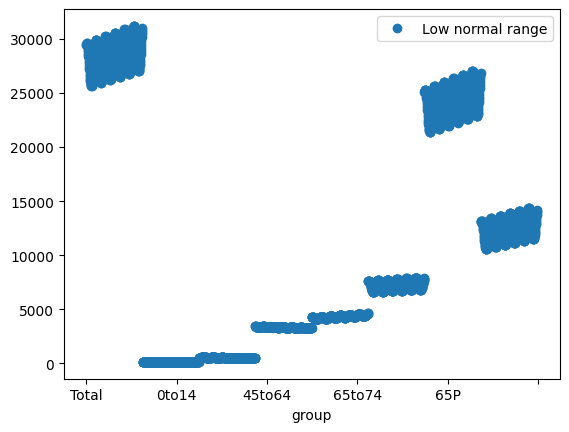

In [8]:
df.plot(x="group", y="Low normal range", style='o')
plt.show()


In [13]:
df1 = pd.read_csv("/content/charts-excess-mortality.csv")
df1

,group,year,week,value
0,Total,2021,0,0
1,Total,2021,1,7706
2,Total,2021,2,17097
3,Total,2021,3,28635
4,Total,2021,4,38947
...,...,...,...,...
1259,85P,2023,47,18976
1260,85P,2023,48,19469
1261,85P,2023,49,20441
1262,85P,2023,50,21543


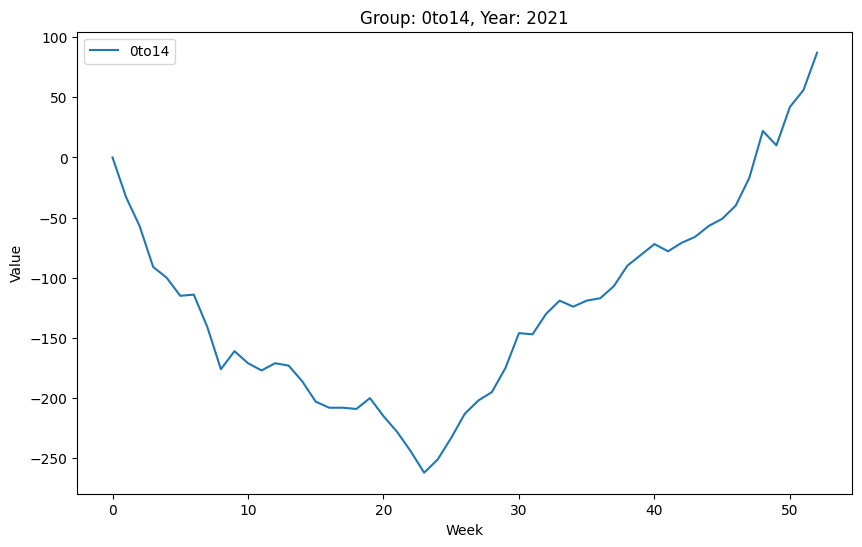

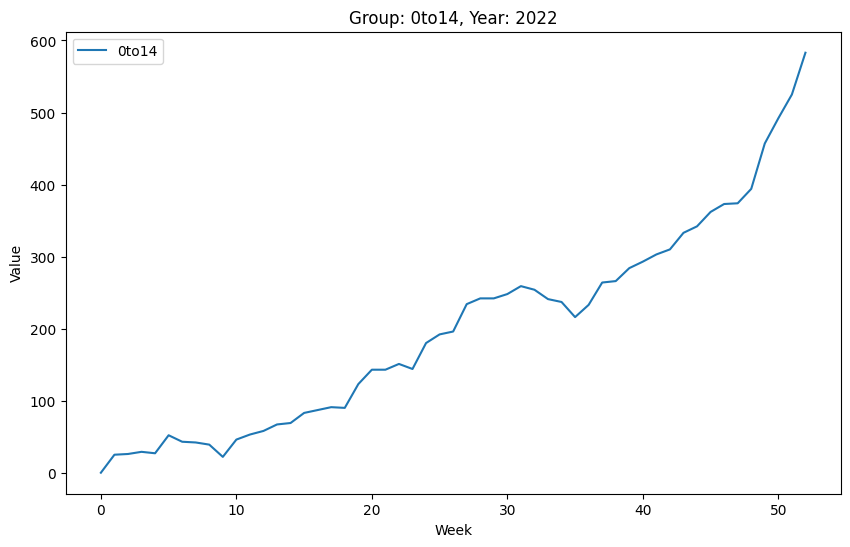

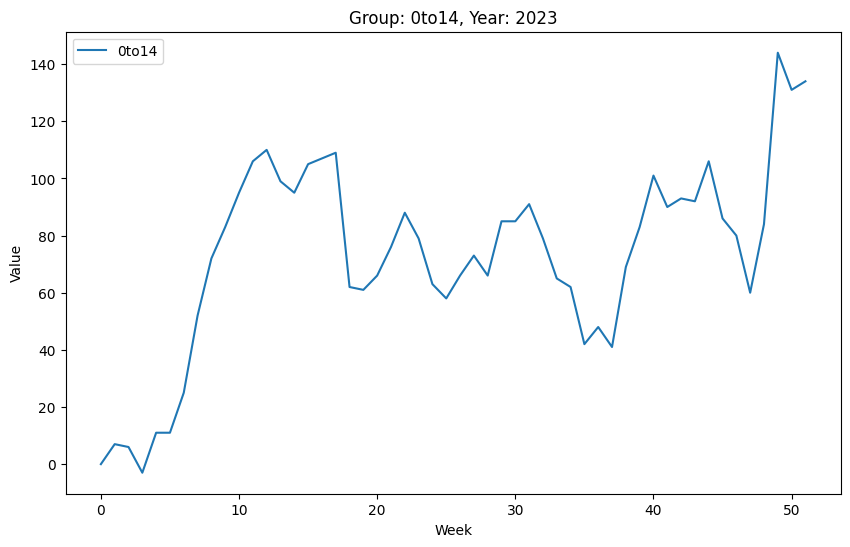

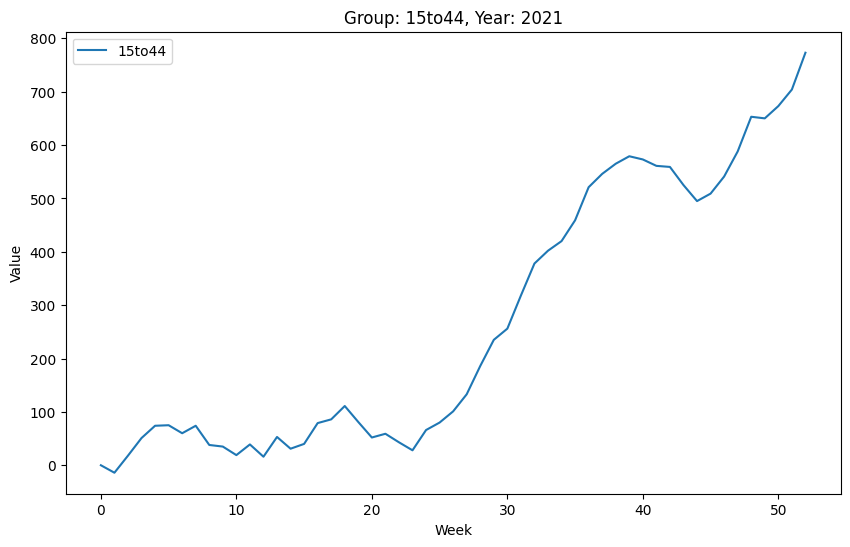

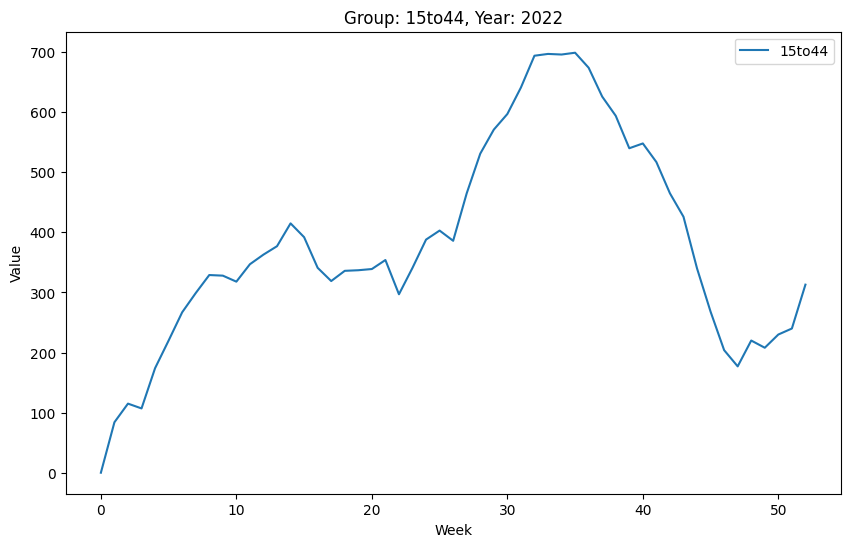

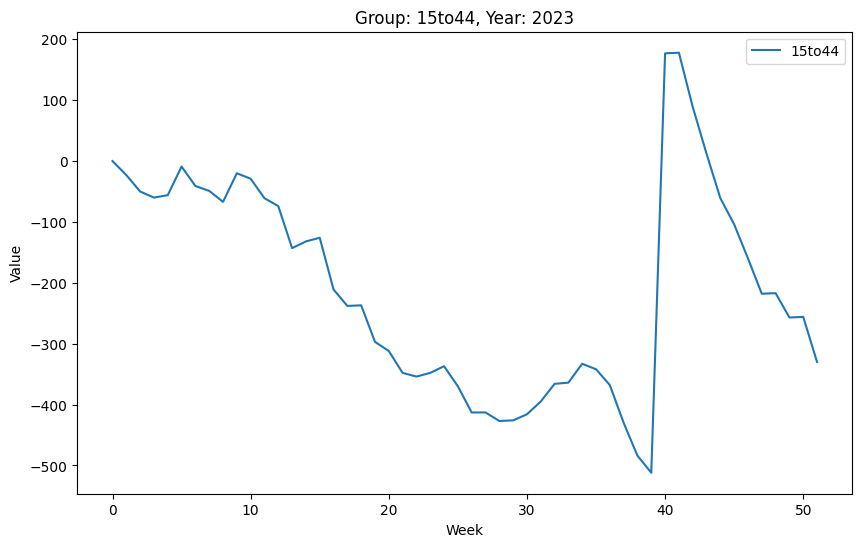

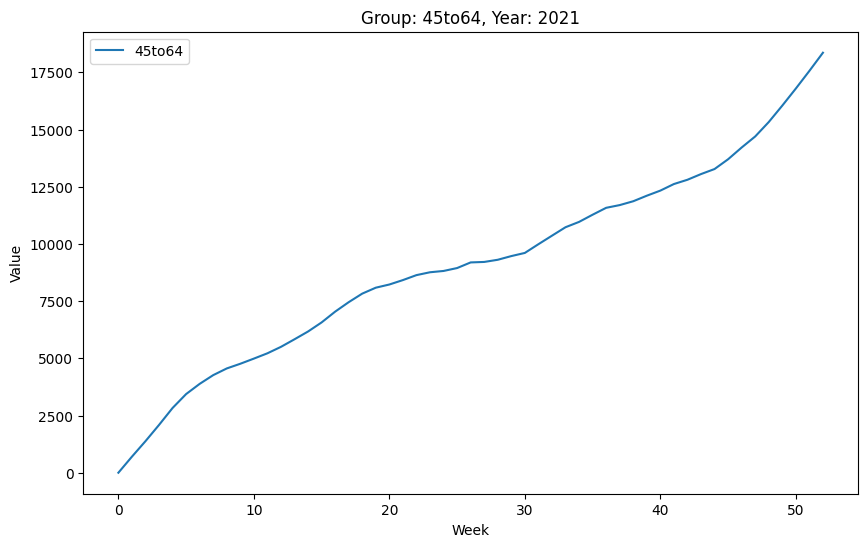

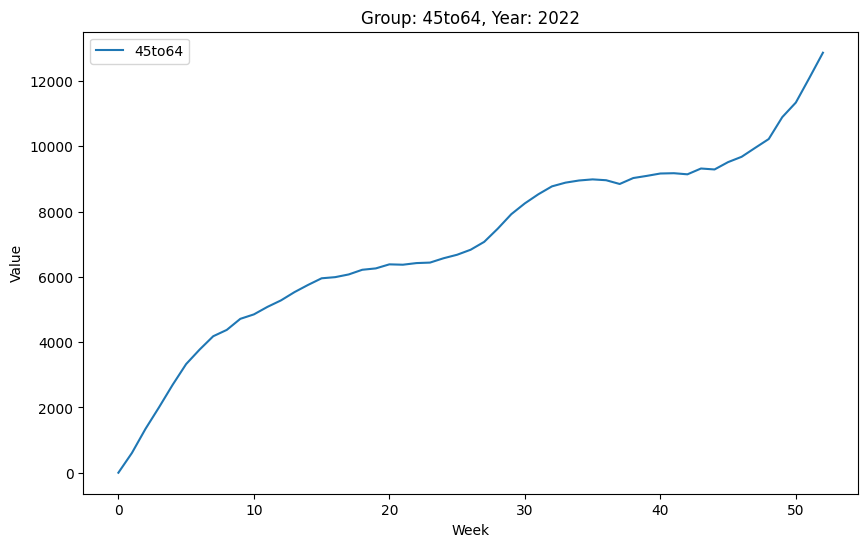

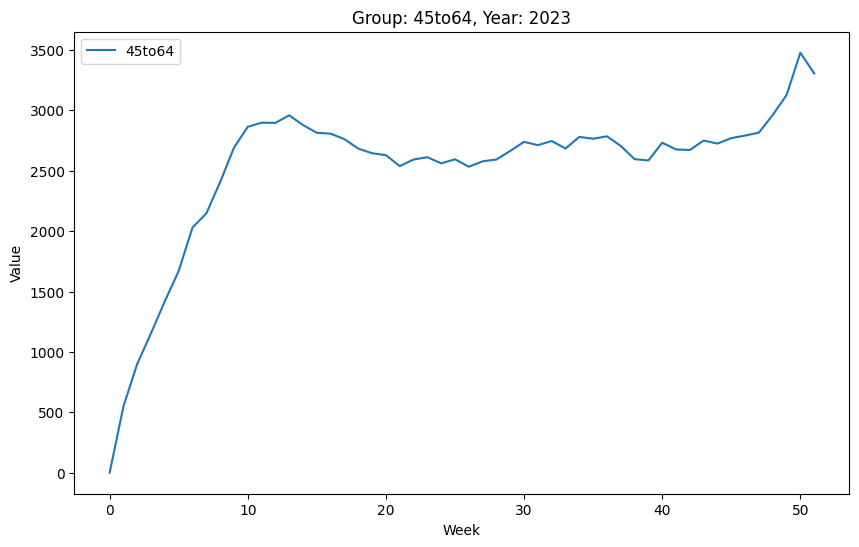

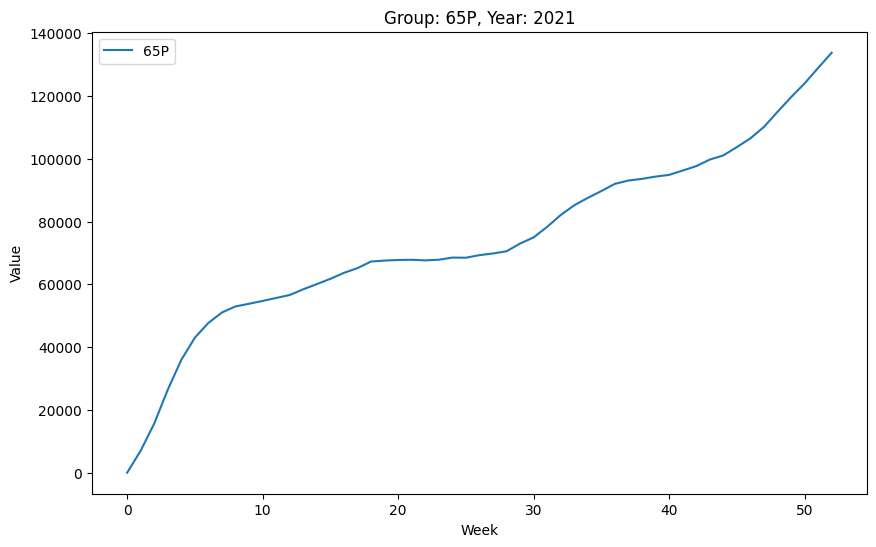

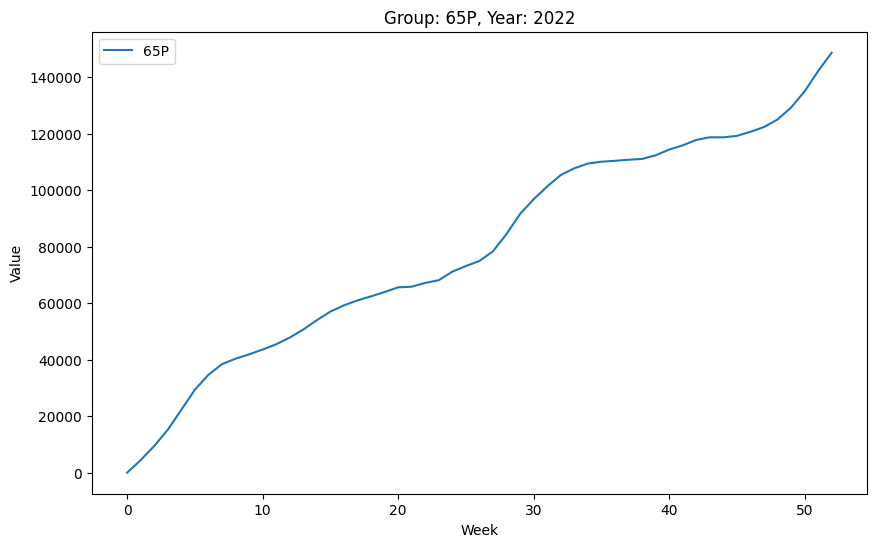

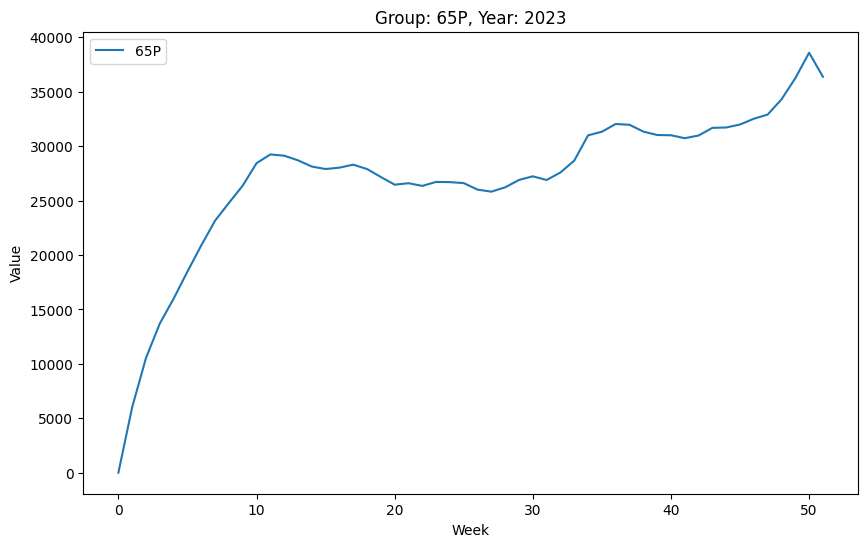

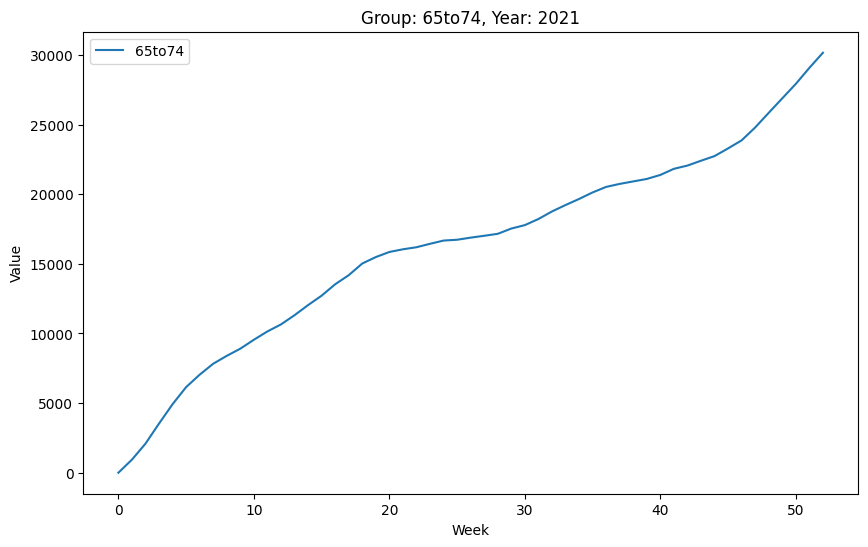

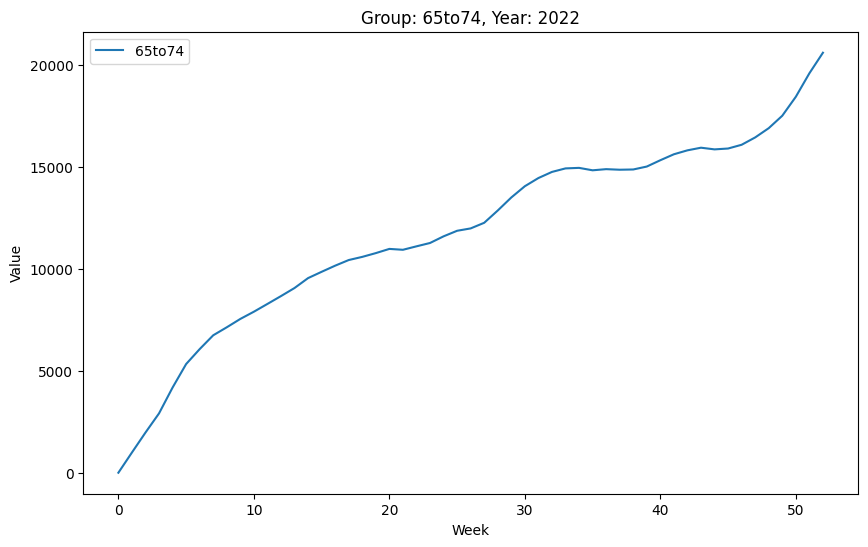

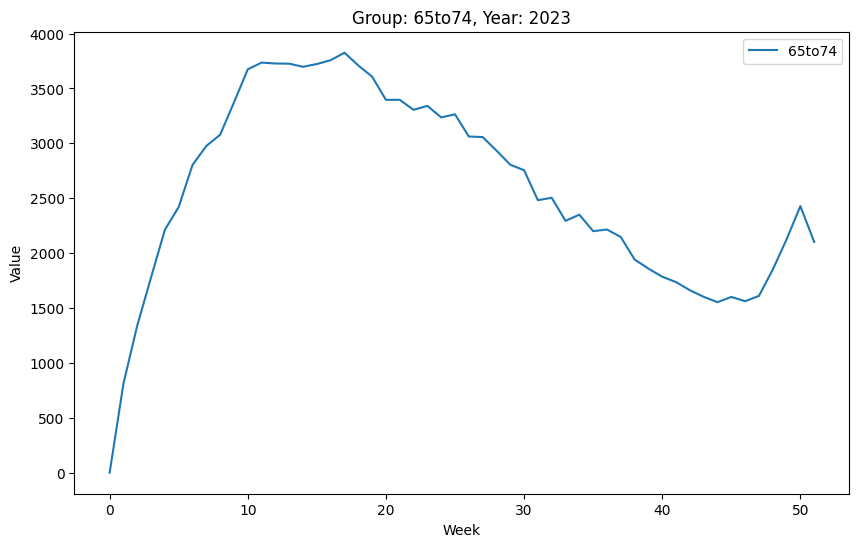

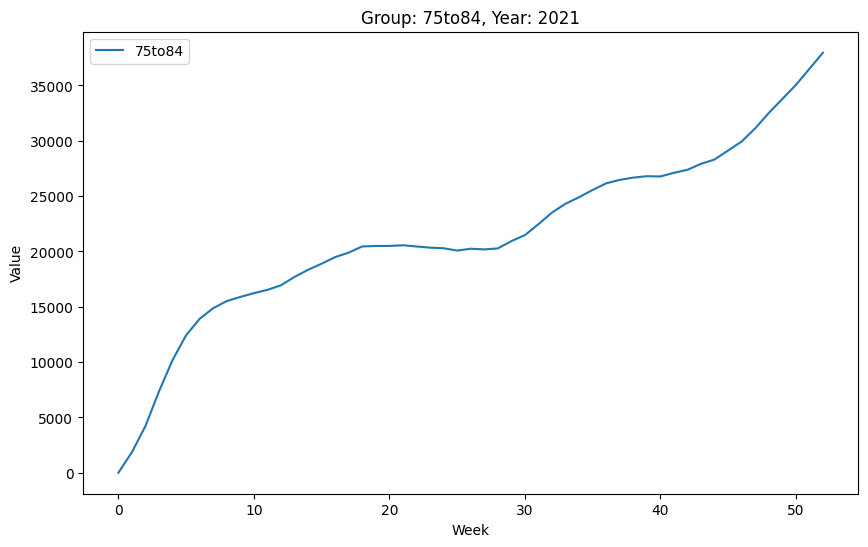

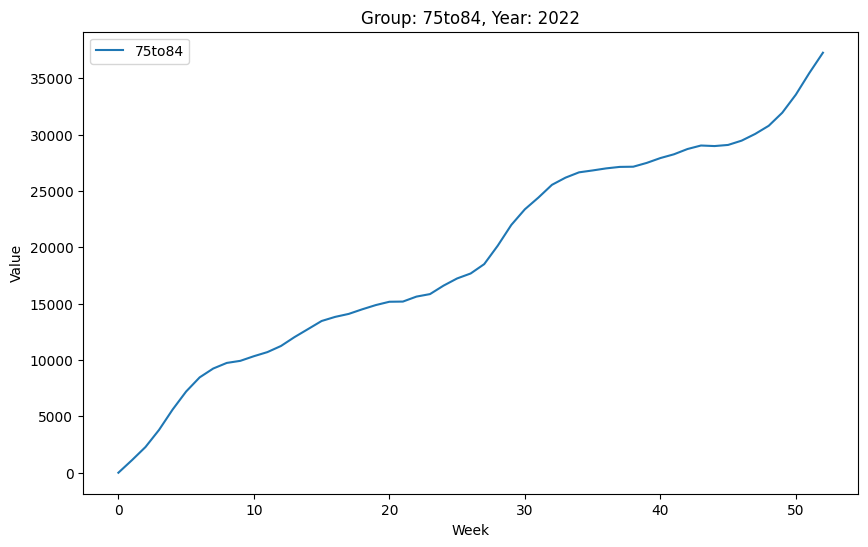

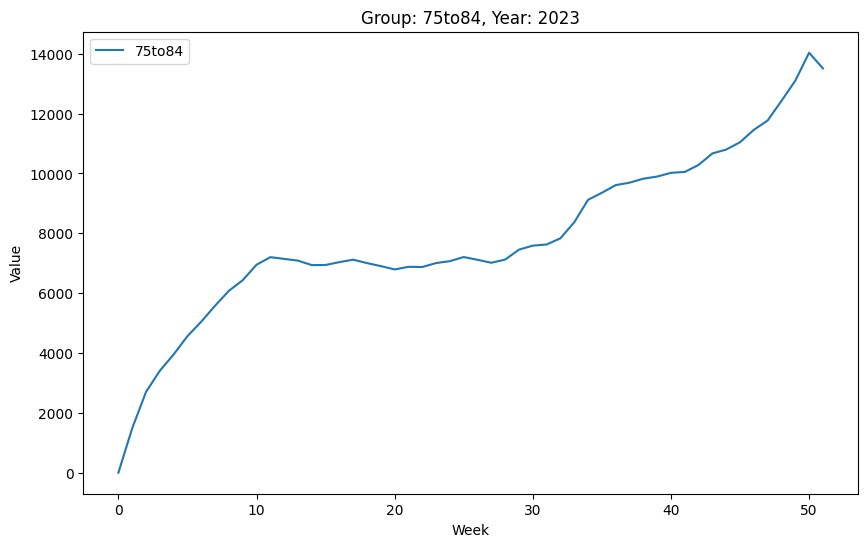

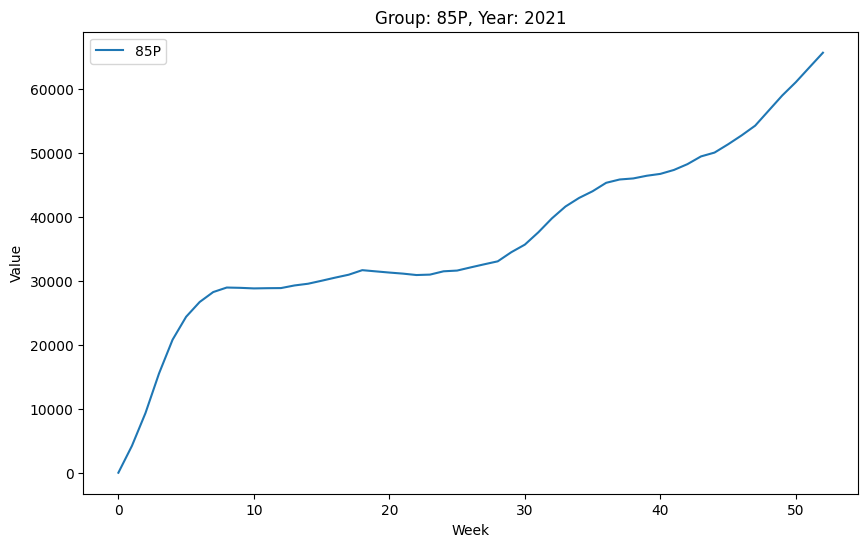

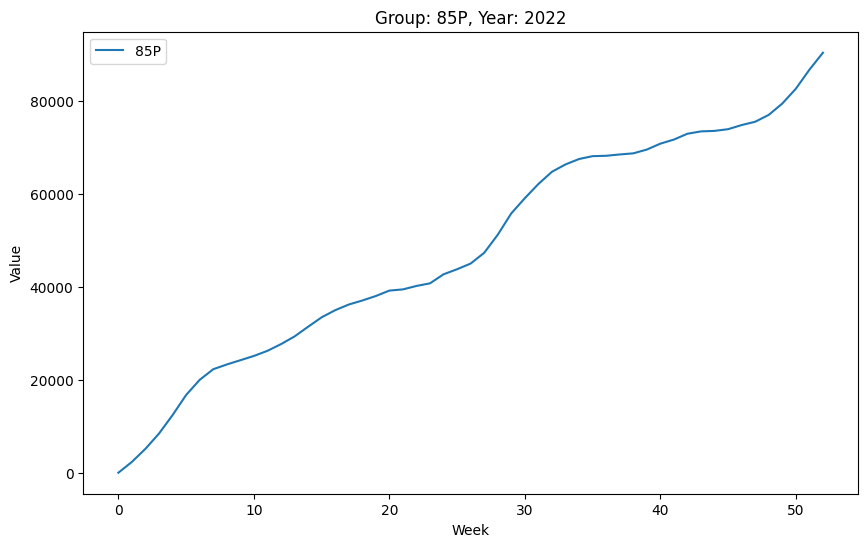

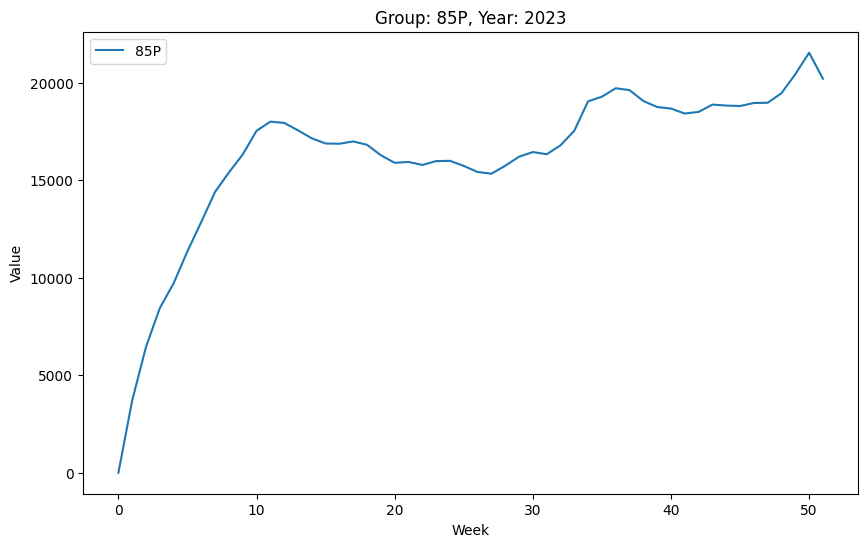

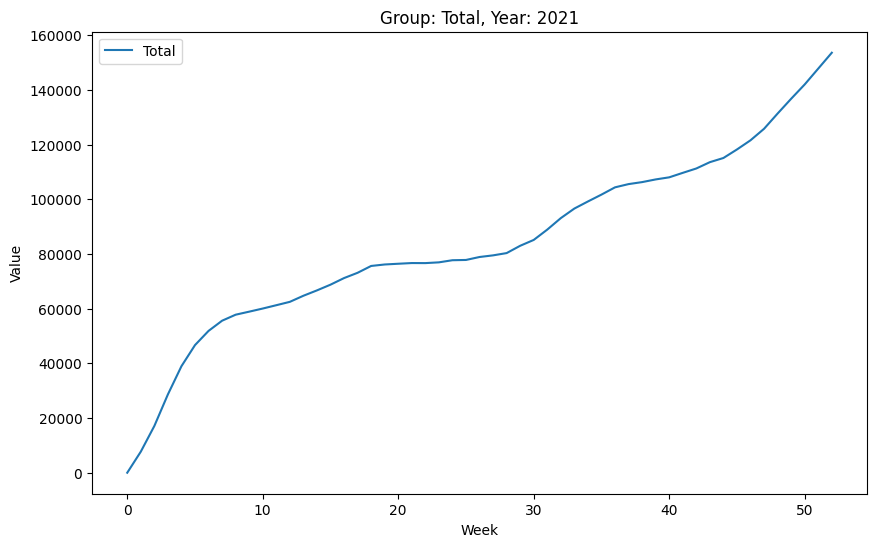

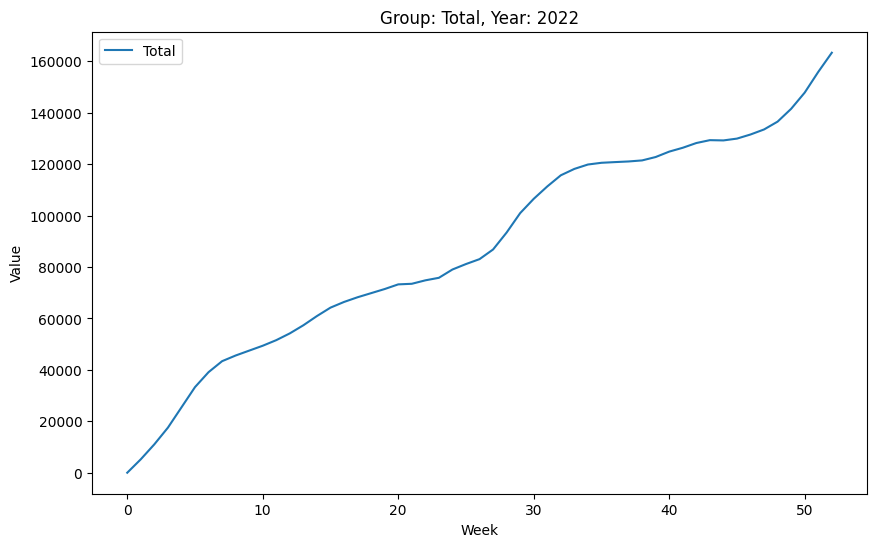

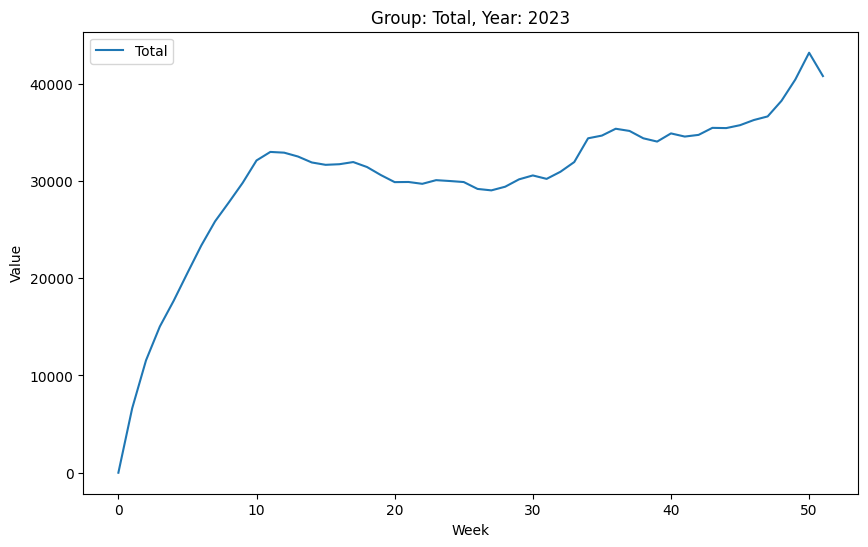

In [24]:
for name, group in df1.groupby(['group', 'year']):
    plt.figure(figsize=(10, 6))
    for label, data in group.groupby('group'):
        plt.plot(data['week'], data['value'], label=label)

    plt.title(f'Group: {name[0]}, Year: {name[1]}')
    plt.xlabel('Week')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


In [25]:
df2 = pd.read_csv("/content/charts-z-scores-by-country.csv")
df2

,country,group,week,zscore
0,Austria,Total,2020-01,-0.58
1,Austria,Total,2020-02,0.66
2,Austria,Total,2020-03,2.29
3,Austria,Total,2020-04,1.88
4,Austria,Total,2020-05,4.08
...,...,...,...,...
2699,Switzerland,Total,2023-47,2.58
2700,Switzerland,Total,2023-48,4.38
2701,Switzerland,Total,2023-49,4.31
2702,Switzerland,Total,2023-50,3.84


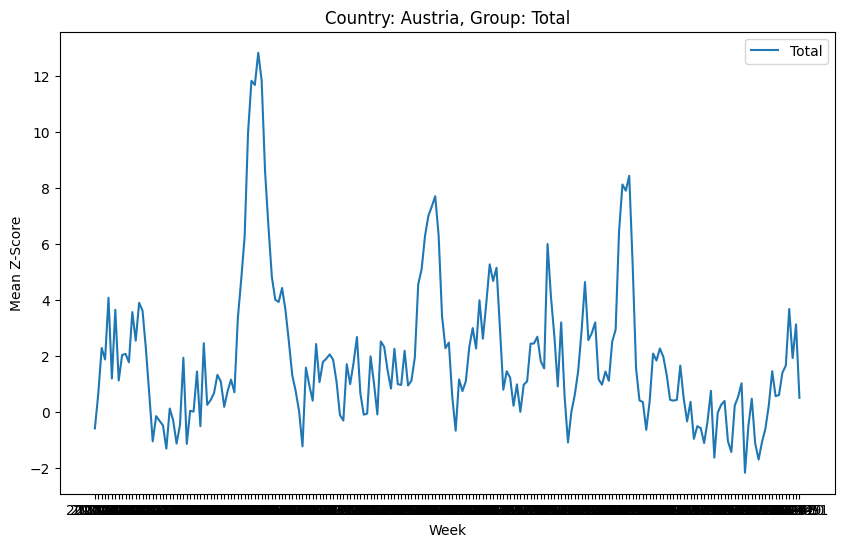

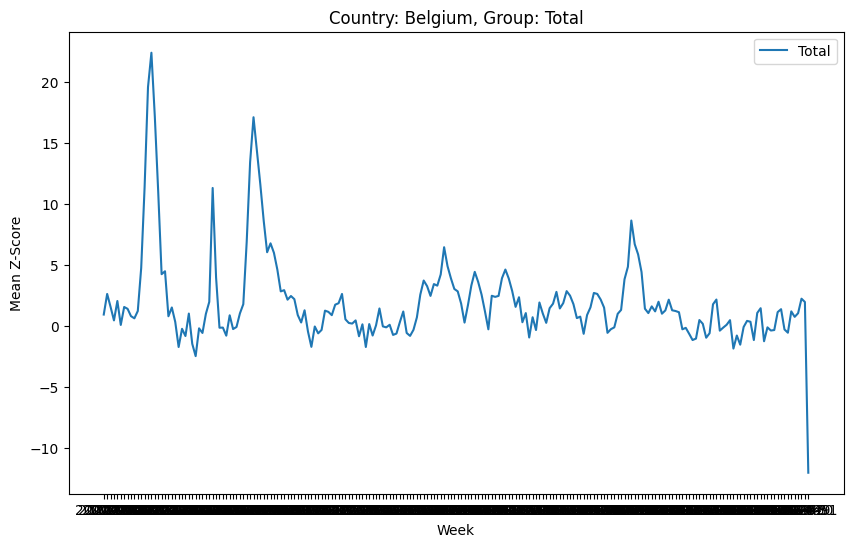

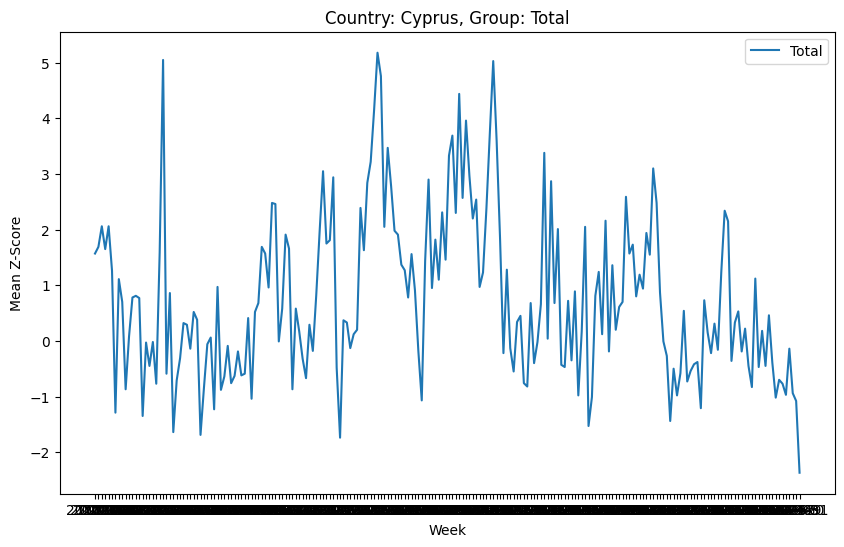

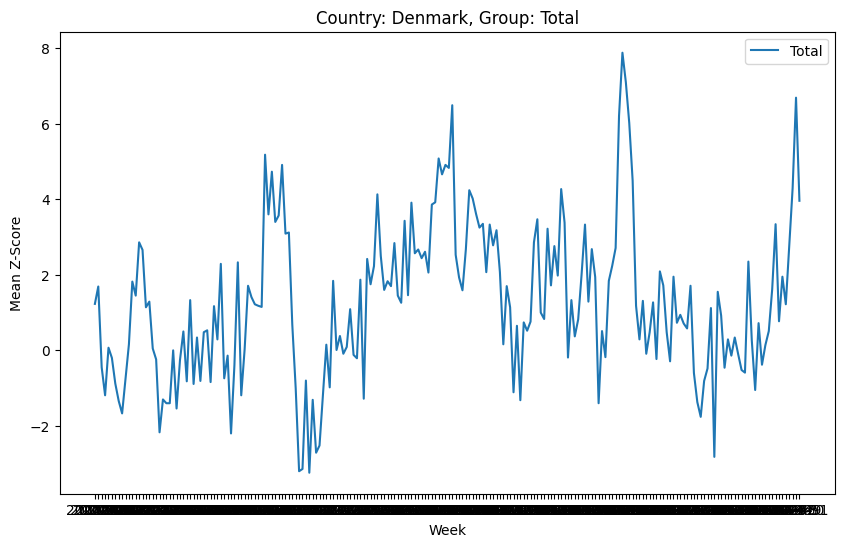

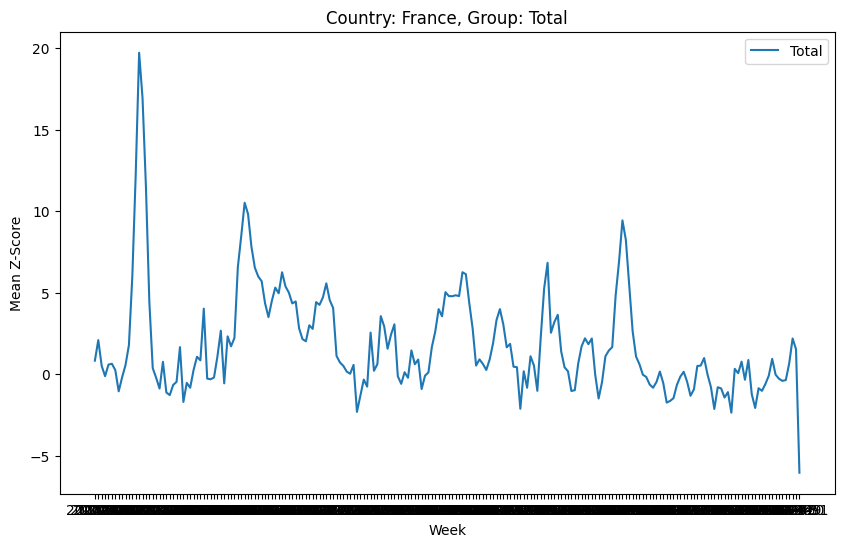

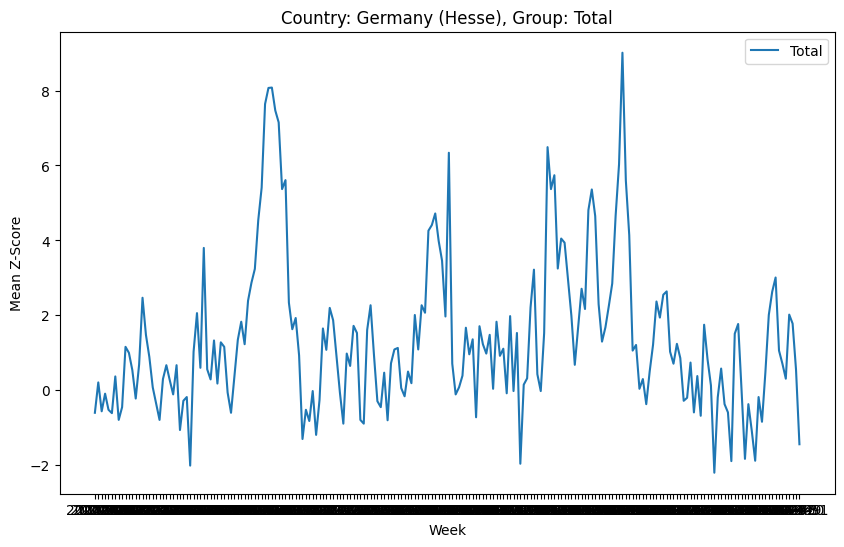

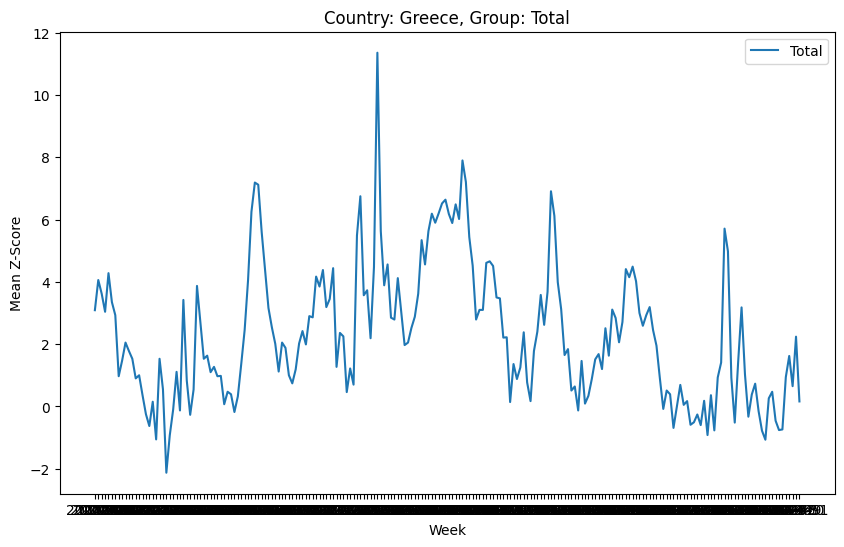

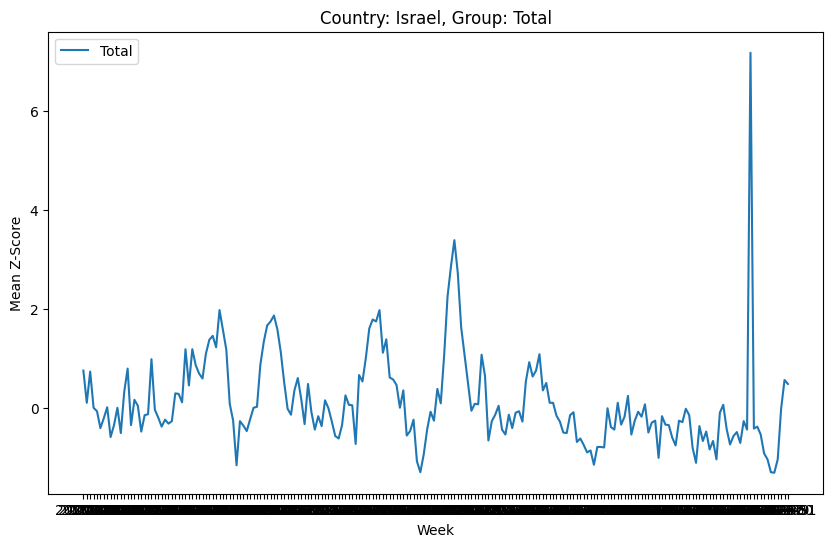

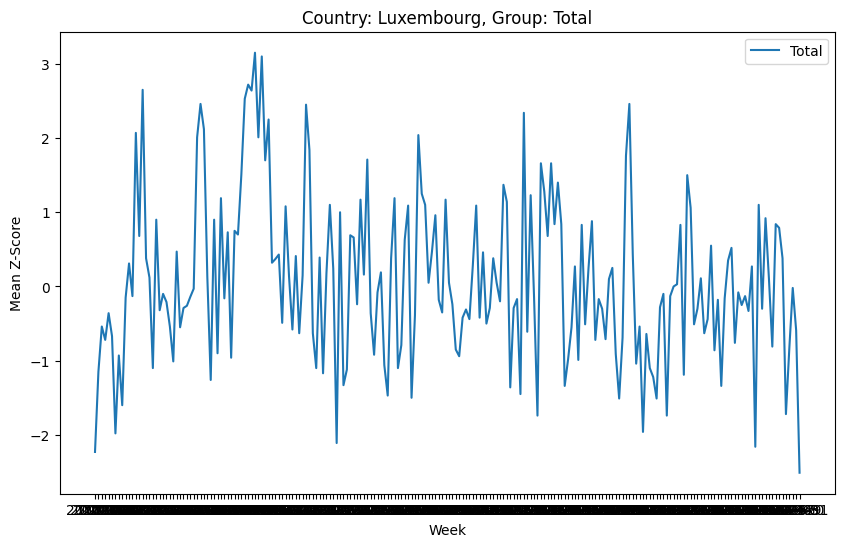

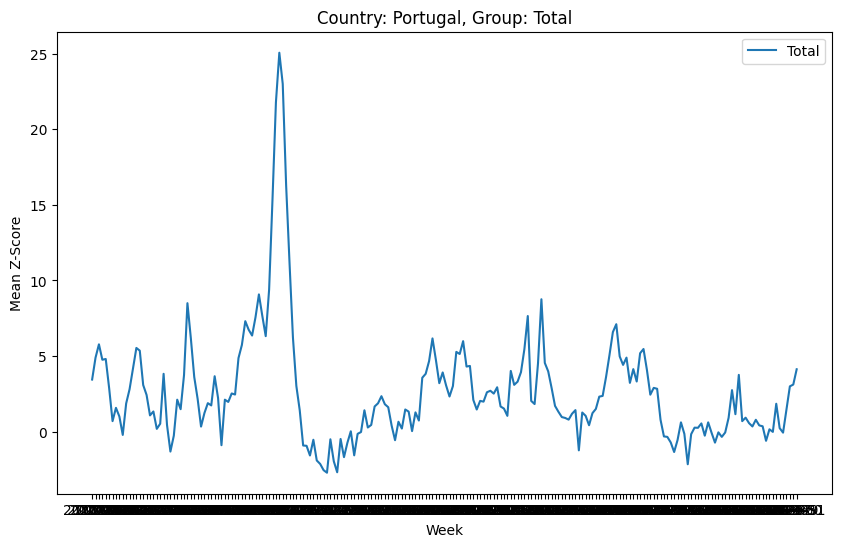

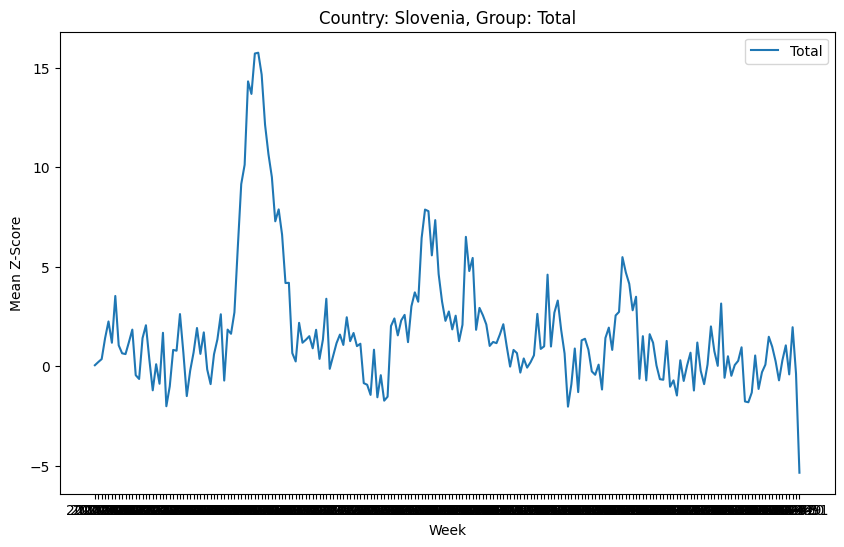

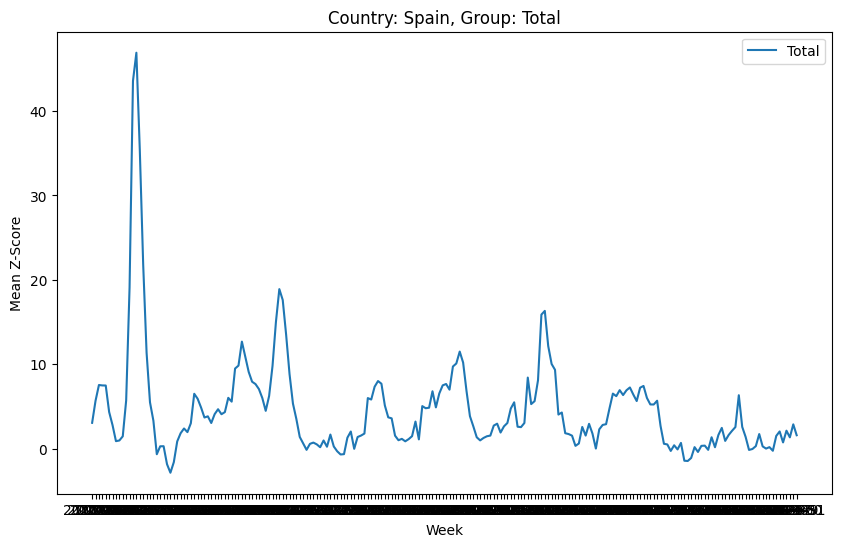

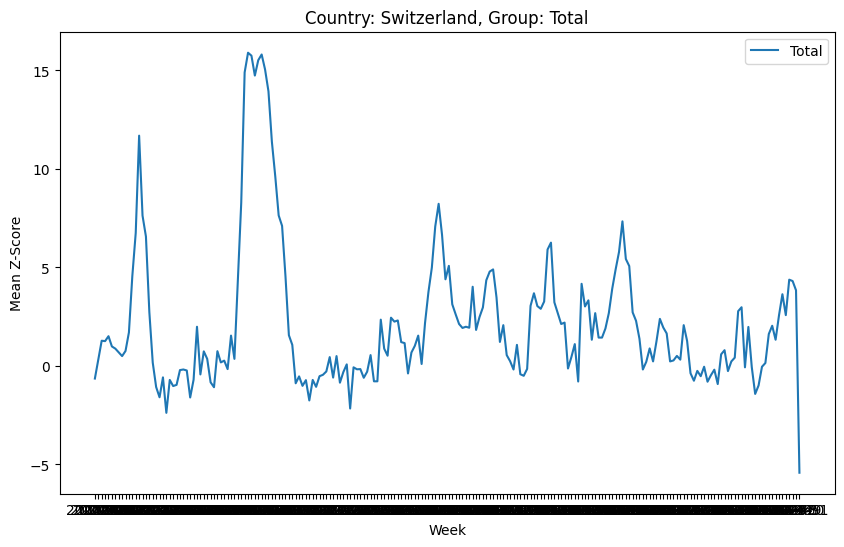

In [29]:
grouped_data = df2.groupby(['country', 'group', 'week']).mean().reset_index()

# Plot the aggregated z-score data
for name, group in grouped_data.groupby(['country', 'group']):
    plt.figure(figsize=(10, 6))
    for label, data in group.groupby('group'):
        plt.plot(data['week'], data['zscore'], label=label)

    plt.title(f'Country: {name[0]}, Group: {name[1]}')
    plt.xlabel('Week')
    plt.ylabel('Mean Z-Score')
    plt.legend()
    plt.show()
